In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Helper function for PCA
# It returns a dataframe with all PCs along the same time series

def do_pca(df):
    # Standard Scaler
    ss = StandardScaler()
    set1_ss = ss.fit_transform(df)

    # PCA
    pca = PCA(random_state = 32)
    pc = pca.fit_transform(set1_ss)

    # Convert to DataFrame for plotting
    pc_df = pd.DataFrame(data=pc, 
                         columns=[f'PC{i+1}' for i in range(len(df.columns))],
                         index = df.index)

    # Print out the explained variance ratio of the first 3 PCs
    # It represents how much of the variance that each PC explains
    var_exp = pca.explained_variance_ratio_
    print(f'Explained variance (first 3 components): {np.round(var_exp[:3],3)}')

    # Print out the accumulating explained variance ratio of the first 3 PCs
    # It represents how much of the variance in total that the first 3 PCs explain
    cum_var_exp = np.cumsum(var_exp)
    print(f'Cumulative explained variance (first 3 components): {np.round(cum_var_exp[:3],3)}')

    # return the DataFrame for plotting
    return pc_df

def arrange_data(cluster):
    # Separate the cluster data into two different dictionaries for manipulation
    dict = {}
    for i in range(0, len(cluster)):
        data = [x for x in cluster.iloc[i].to_list() if str(x) != 'nan']
        dict[f'cluster{i+1}'] = data

    sets = {}
    for counter, c in enumerate(dict, 1):
        data = ccy[dict[c]]
        sets[f'set{counter}'] = data

    return dict, sets

def plot_pca(pc):
    pc_dict = {}
    for counter, pc in enumerate(pc):
        df = pd.DataFrame(data=pc,
                          columns=['PC1','PC2'],
                          index=pc.index)
        df['Equal_weighted_PC'] = df.mean(axis=1)
        # df['Combined_PC'] = df.sum(axis=1)
        plt.figure(figsize=(10,5))
        df['Equal_weighted_PC'].plot()
        # df['Combined_PC'].plot()
        plt.xlabel('date')
        plt.ylabel('PC1+PC2 equal weight')
        plt.title(f'PC1+PC2 for cluster {counter+1}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        pc_dict[f'cluster{counter+1}'] = df
    return pc_dict

In [2]:
# read data
dtw_cluster = pd.read_csv('../data/DTW_cluster.csv')

ccy = pd.read_csv('../data/ccy1996_to_2023(c).csv')
ccy = ccy[313:]
ccy.set_index('Date', inplace=True)

In [3]:
dict, sets = arrange_data(dtw_cluster)

In [4]:
list_pc = []
for s in sets:
    print(f'PCA for {s}')
    pca = do_pca(sets[s])
    list_pc.append(pca)
    print(' ')

PCA for set1
Explained variance (first 3 components): [0.512 0.278 0.133]
Cumulative explained variance (first 3 components): [0.512 0.79  0.923]
 
PCA for set2
Explained variance (first 3 components): [0.688 0.207 0.069]
Cumulative explained variance (first 3 components): [0.688 0.895 0.965]
 
PCA for set3
Explained variance (first 3 components): [0.508 0.244 0.136]
Cumulative explained variance (first 3 components): [0.508 0.752 0.888]
 


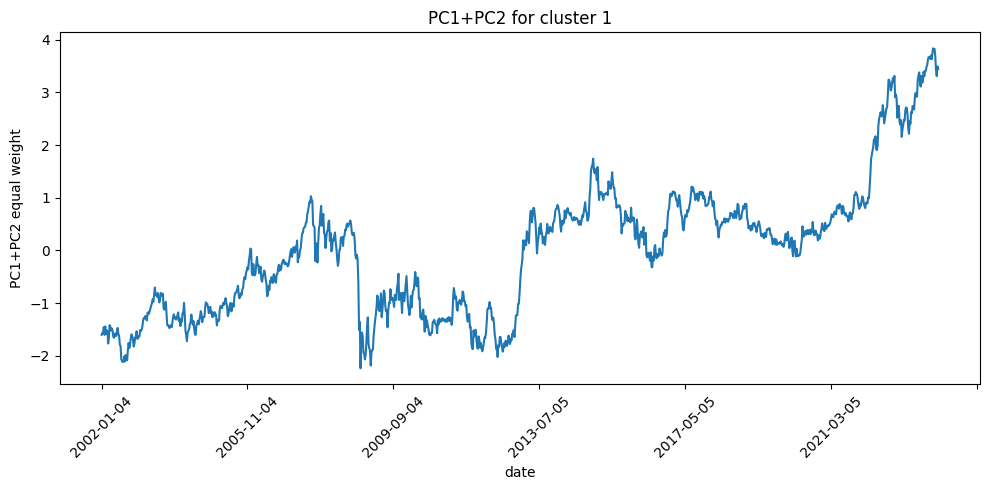

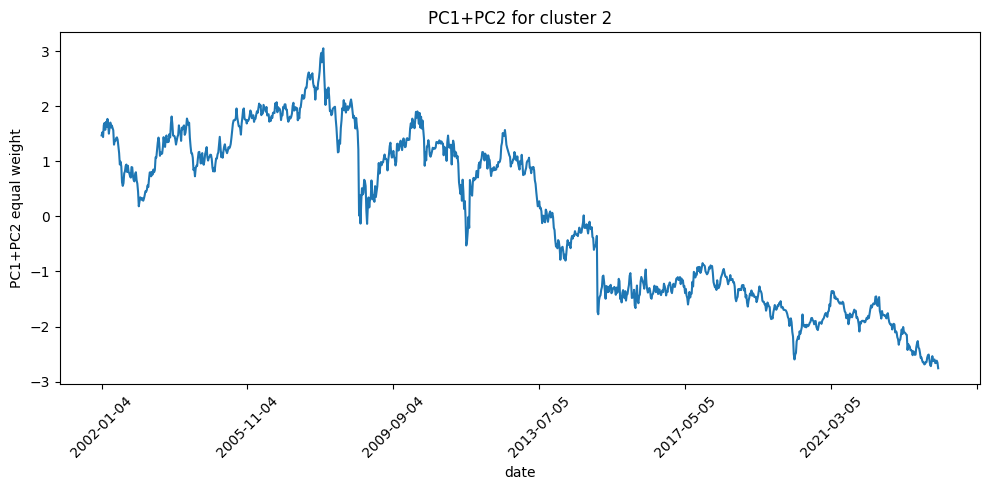

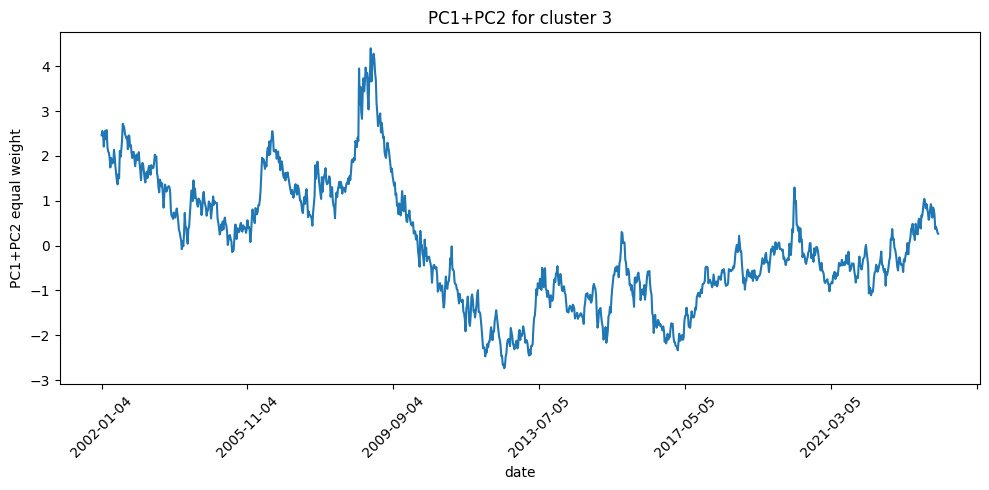

In [5]:
# Calculate the equally-weighted PC for the first two PCs
# Plot out this PC
# Save the respective PCs in different DataFrame for future use
pc = plot_pca(list_pc)

In [6]:
for i in dict:
    print(f'{i}: {dict[i]}')

cluster1: ['USDGBP', 'USDJPY', 'AUDJPY', 'NZDJPY', 'EURGBP', 'EURJPY', 'CADJPY', 'CHFJPY']
cluster2: ['USDCHF', 'AUDNZD', 'GBPAUD', 'AUDCHF', 'GBPNZD', 'NZDCHF', 'EURCHF', 'GBPCAD', 'GBPCHF', 'CADCHF']
cluster3: ['USDAUD', 'USDNZD', 'USDEUR', 'USDCAD', 'EURAUD', 'AUDCAD', 'EURNZD', 'NZDCAD', 'EURCAD', 'GBPJPY']


In [7]:
# export pc for each cluster into csv
for i in pc:
    pc[i].to_csv(f'../data/{i}_pc.csv')